<a href="https://colab.research.google.com/github/kmkkkp/2023_2_mogakso/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation

### Types of Segmentation

- Semantic Segmentation
- Instance Segmentation


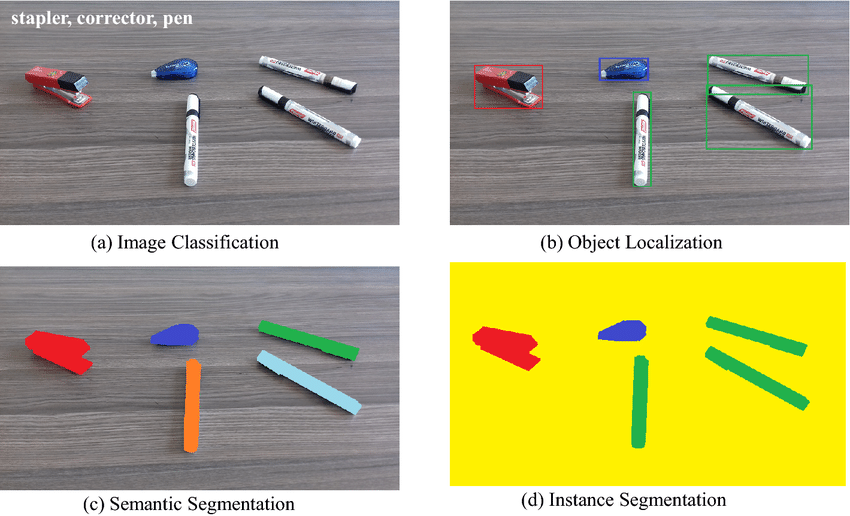

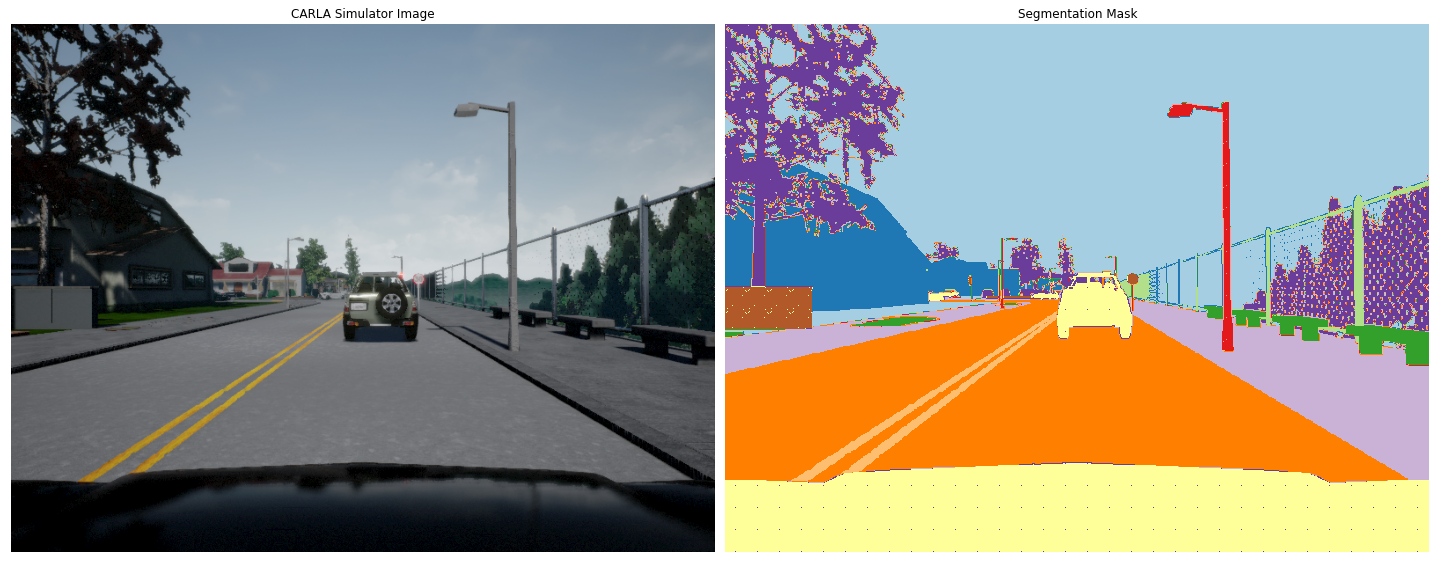

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# R-CNN
RCNN은 다른 딥러닝 아키텍쳐에 비해 운용이 용이하다.
 -  객체 주변에 bbox를(Region) 만들어서  Region을 우선적으로 CNN분석.
 - 그 중 MASK R-CNN은 R-CNN(2013), Fast R-CNN(2015), Faster R-CNN(2015)

In [ ]:
%cd /content/drive/MyDrive/CV_modules

!git clone https://github.com/alsombra/Mask_RCNN-TF2

%cd Mask_RCNN-TF2

!ls

/content/drive/MyDrive/CV_modules
fatal: destination path 'Mask_RCNN-TF2' already exists and is not an empty directory.
/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2
assets	LICENSE      mrcnn	requirements.txt  setup.cfg
images	MANIFEST.in  README.md	samples		  setup.py


In [ ]:
!pip install -r requirements.txt
!python setup.py install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 5.7 MB/s eta 0:00:00
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        By 2023-Sep-26, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.

   

In [ ]:
%cd ..

/content/drive/MyDrive/CV_modules


In [ ]:
!ls

Mask_RCNN-TF2


In [ ]:
import os
root_dir = os.path.abspath('./Mask_RCNN-TF2')
root_dir

'/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2'

In [ ]:
import sys
sys.path.append(root_dir)
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2']

In [ ]:
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [ ]:
sys.path.append(os.path.join(root_dir, 'samples/coco/'))
import coco

In [ ]:
MODEL_DIR = os.path.join(root_dir, 'logs')
IMAGE_DIR = os.path.join(root_dir, 'images')
MODEL_DIR, IMAGE_DIR

('/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/logs',
 '/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/images')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
COCO_MODEL_PATH = os.path.join(root_dir, 'mask_rcnn_coco.h5')
COCO_MODEL_PATH

'/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/mask_rcnn_coco.h5'

In [ ]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [ ]:
config = InferenceConfig()

In [ ]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
network = modellib.MaskRCNN(mode = 'inference',
                            model_dir = MODEL_DIR,
                            config = config
                            )

Instructions for updating:
Use fn_output_signature instead


In [ ]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
len(class_names)

81

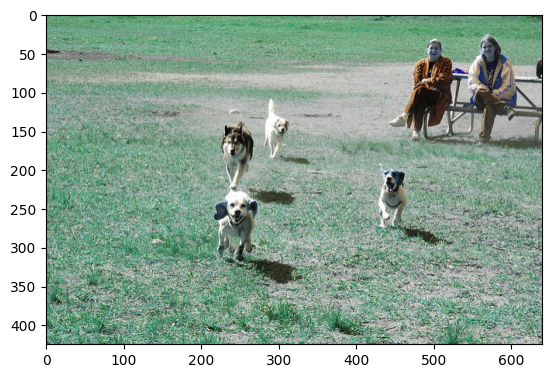

In [ ]:
img_path = '/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg'
image_BGR = cv2.imread(img_path)
plt.imshow(image_BGR)

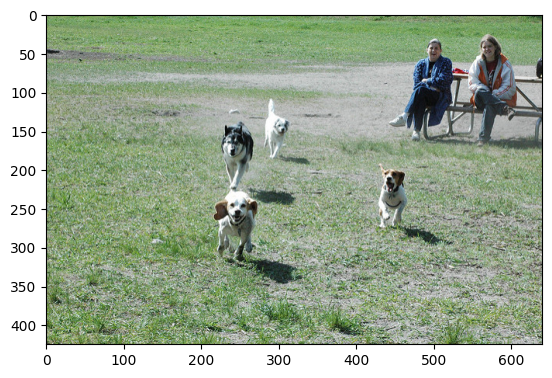

In [ ]:
image_RGB = skimage.io.imread(img_path)
plt.imshow(image_RGB)

In [ ]:
result = network.detect([image_BGR], verbose = 0)
result

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[107, 281, 188, 314],
         [226, 216, 322, 273],
         [195, 426, 278, 467],
         [ 26, 540, 164, 607],
         [ 30, 449, 159, 529],
         [135, 225, 230, 268],
         [ 82, 455, 162, 631]], dtype=int32),
  'class_ids': array([17, 17, 17,  1,  1, 17, 14], dtype=int32),
  'scores': array([0.99975175, 0.99974173, 0.99963343, 0.9980563 , 0.9980552 ,
         0.99759954, 0.92435384], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
       

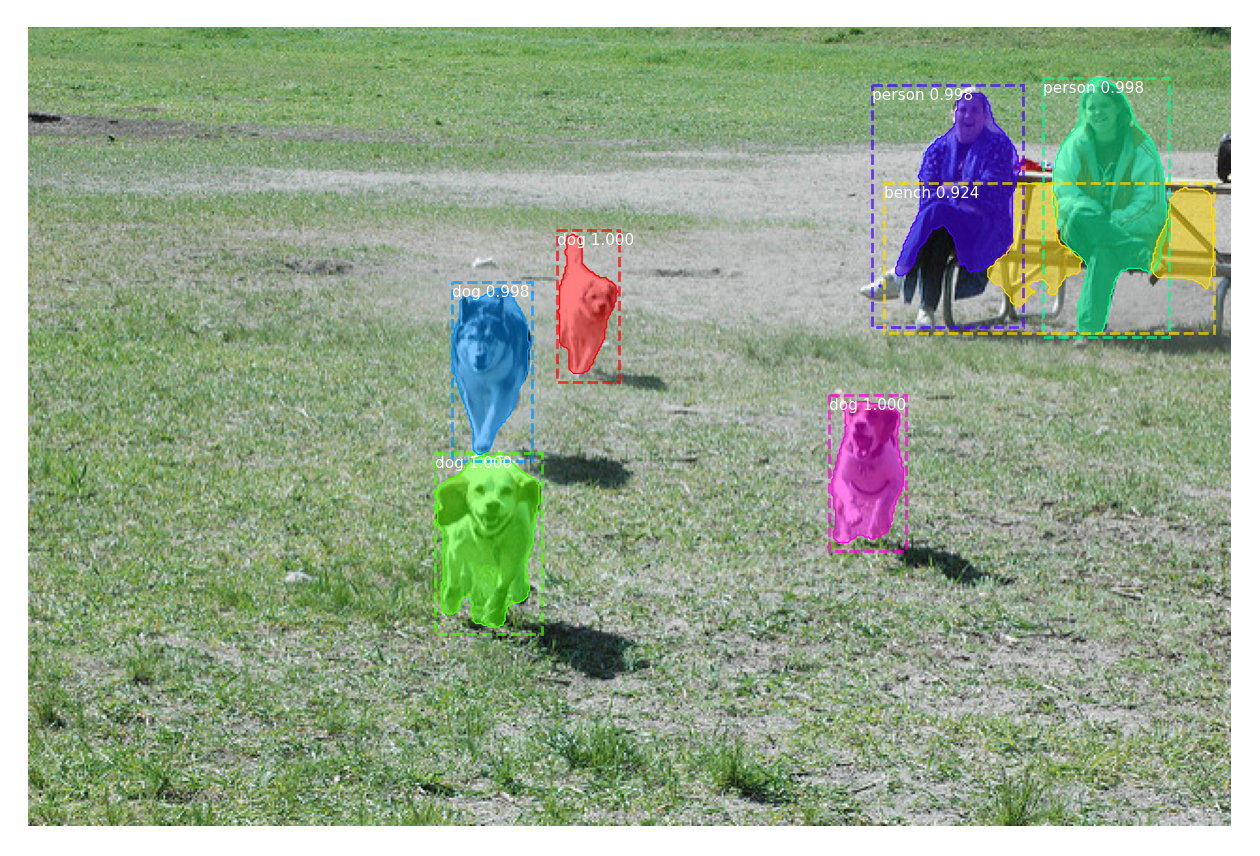

In [ ]:
r = result[0]
visualize.display_instances(image_RGB,
                            r['rois'],
                            r['masks'],
                            r['class_ids'],
                            class_names,
                            r['scores'],
)

# 배경 제거 / 객체 추출

In [ ]:
image = image_RGB
np.unique(r['masks'], return_counts=True)
r['masks']

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [ ]:
def segment(image, r, index):
  mask = r['masks'][:,:,index]
  #print(mask)
  #print(mask.shape)

  mask = np.stack((mask,) * 3, axis = -1)
  #print(mask)
  #print(mask.shape)

  mask = mask.astype('uint8')
  #print(mask)
  bg = 255 - mask * 255
  #print(mask, mask.min(), mask.max())

  mask_show = np.invert(bg)
  #print(mask_show)
  mask_img = image * mask
  #print(mask_img)

  result = mask_img + bg
  return result, mask_show

In [ ]:
image.shape, 425 * 640

((425, 640, 3), 272000)

In [ ]:
segmentation, mask_obj = segment(image, r, 0)
segmentation

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
mask_obj

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')

  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))


  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

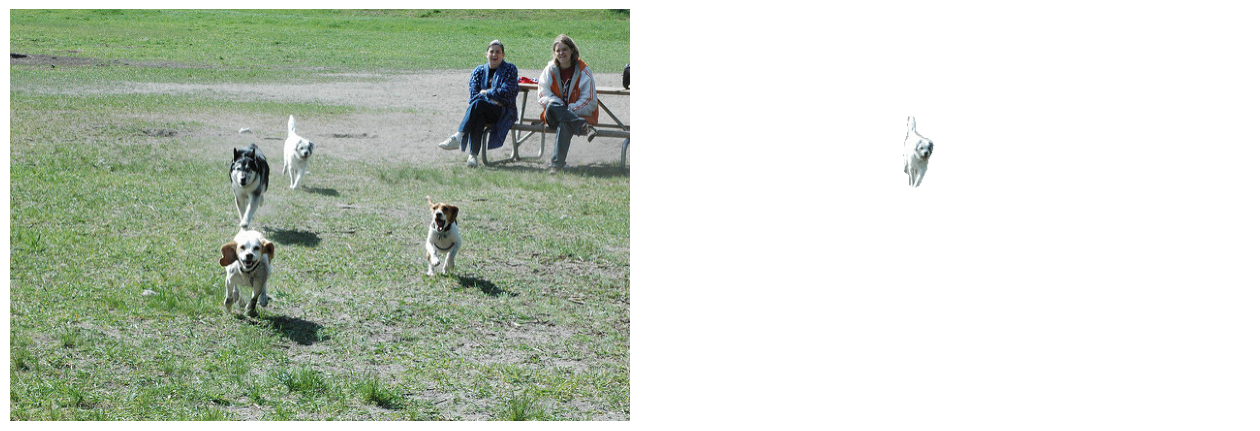

In [ ]:
show_segment(image, r, 0, False)

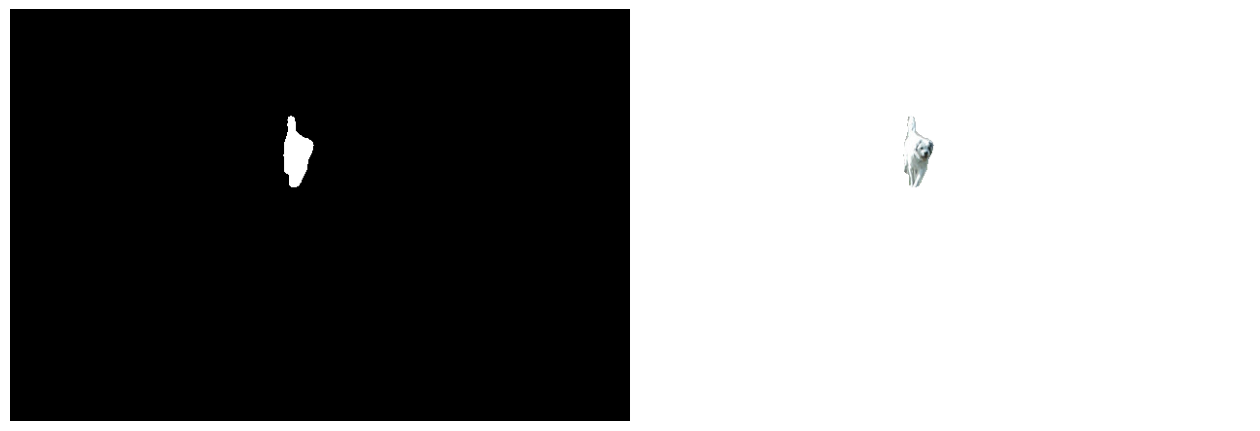

In [ ]:
show_segment(image, r, 0, True)

In [ ]:
r['rois'], len(r['rois'])

(array([[107, 281, 188, 314],
        [226, 216, 322, 273],
        [195, 426, 278, 467],
        [ 26, 540, 164, 607],
        [ 30, 449, 159, 529],
        [135, 225, 230, 268],
        [ 82, 455, 162, 631]], dtype=int32),
 7)

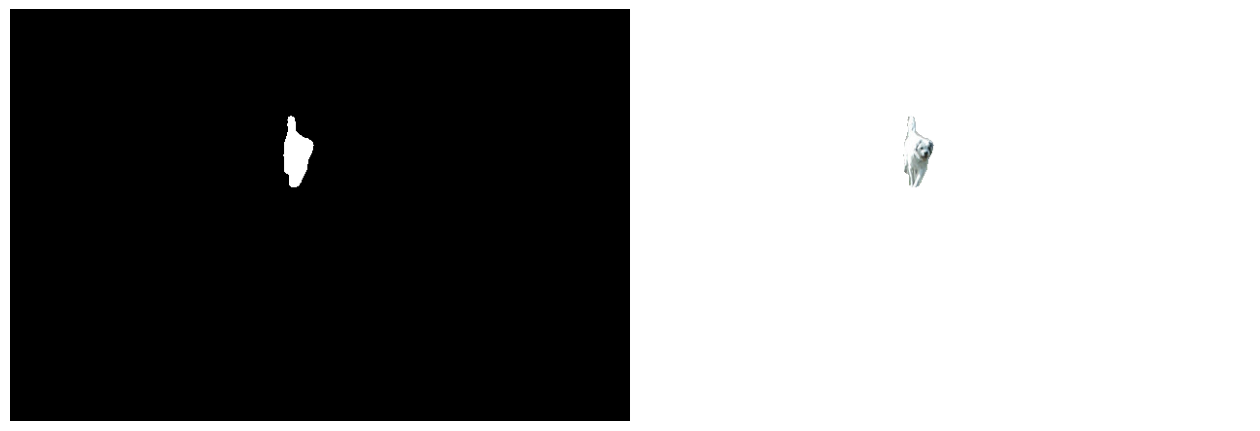

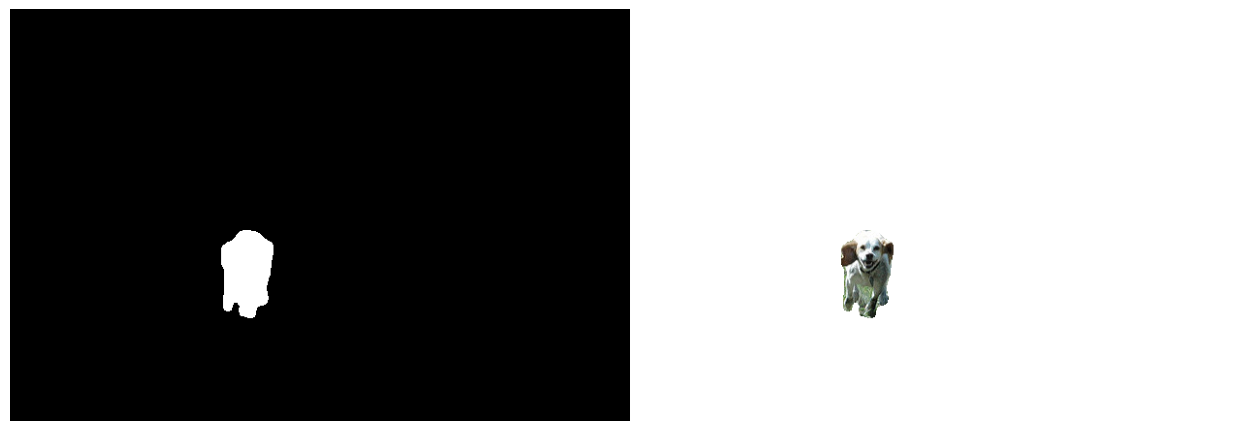

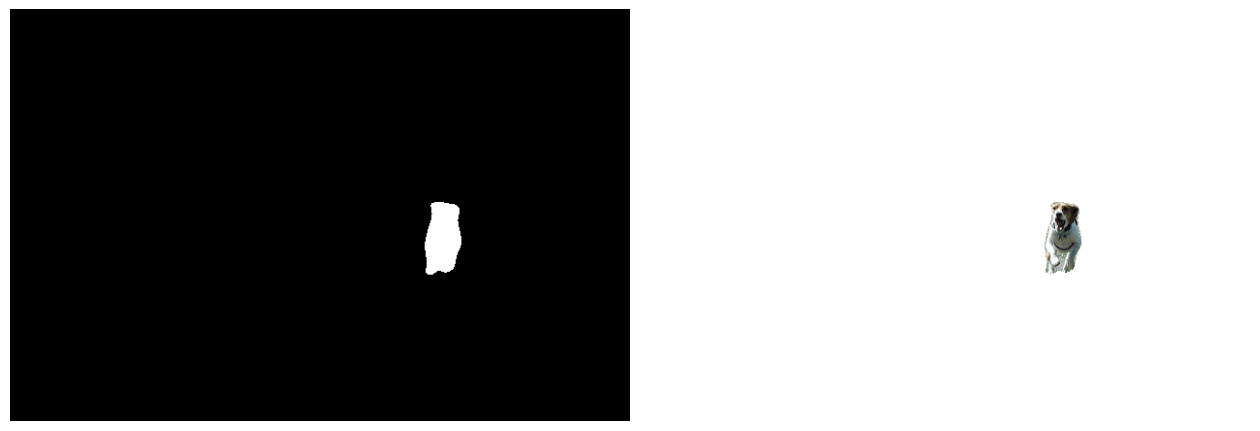

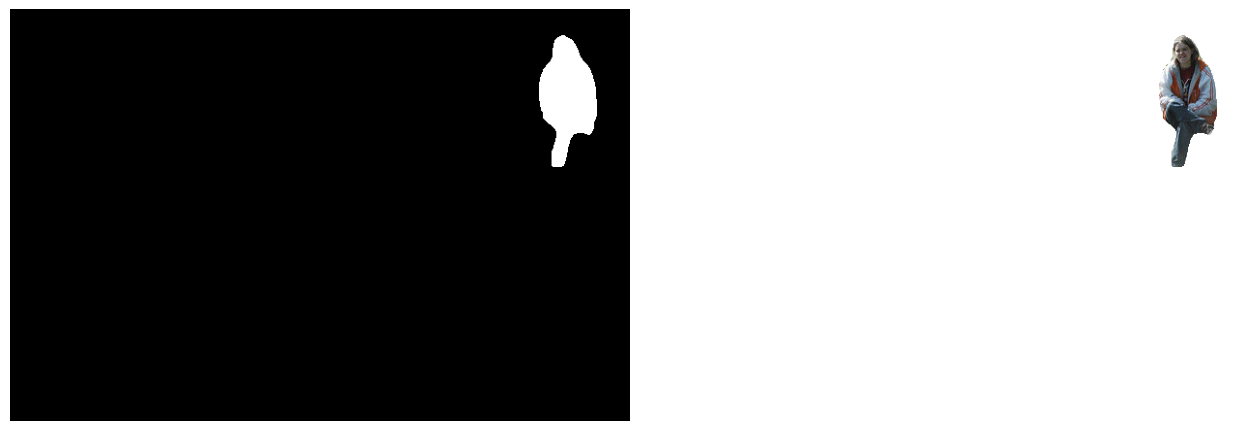

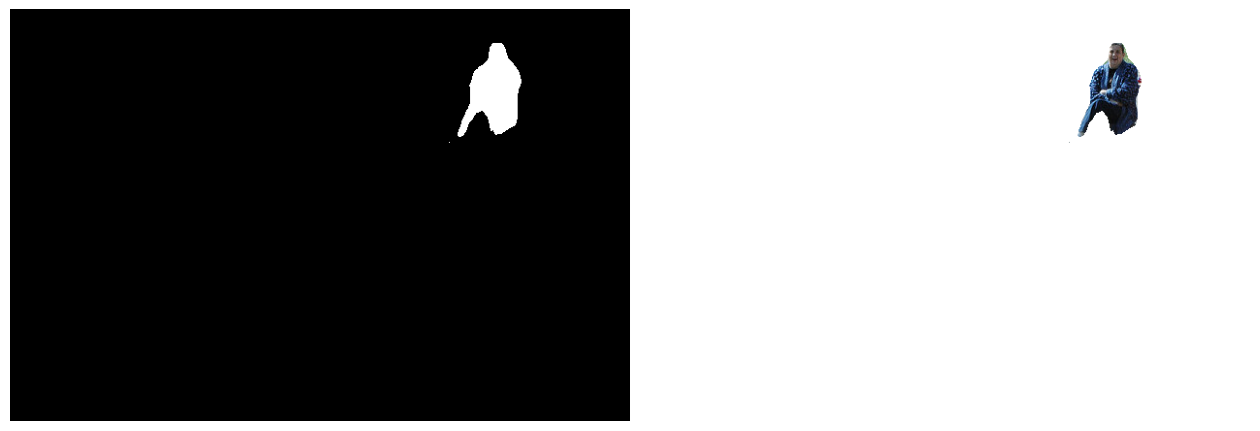

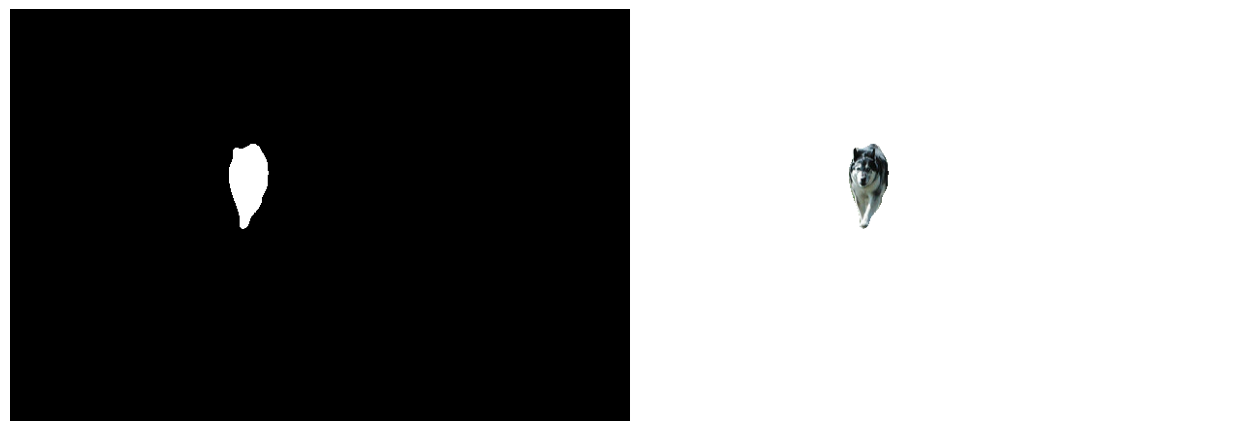

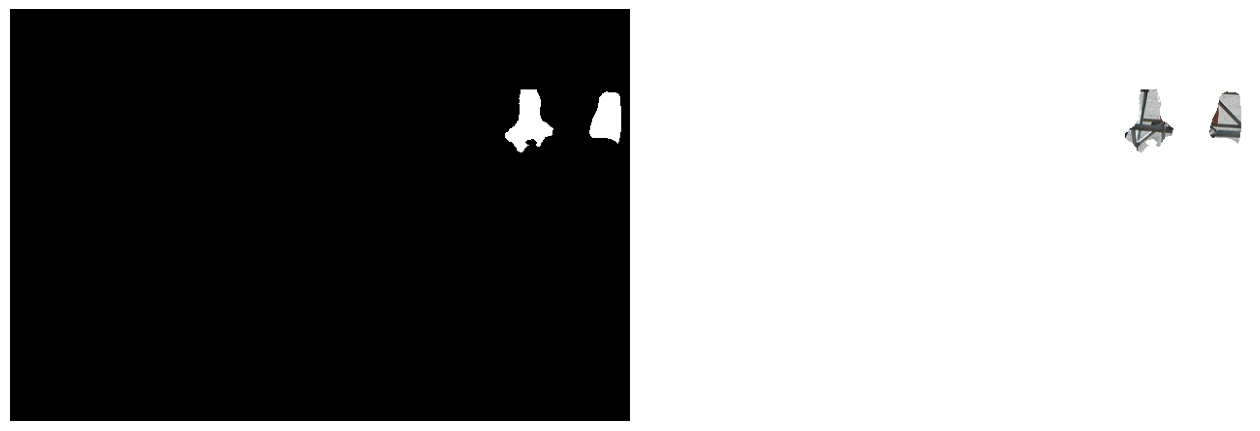

In [ ]:
for index in range(len(r['rois'])):
  show_segment(image, r, index, True)

In [ ]:
np.unique(r['masks'], return_counts = True)

(array([False,  True]), array([1882439,   21561]))

In [ ]:
def segment(image, r, index):
  mask = r['masks'][:,:,index]
  #print(mask)
  #print(mask.shape)

  mask = np.stack((mask,) * 3, axis = -1)
  #print(mask)
  #print(mask.shape)

  mask = mask.astype('uint8')
  #print(mask)
  bg = 255 - mask * 255
  #print(mask, mask.min(), mask.max())

  mask_show = np.invert(bg)
  #print(mask_show)
  mask_img = image * mask
  #print(mask_img)

  result = mask_img + bg
  return result, mask_show

In [ ]:
segmentation, mask_obj = segment(image, r, 0)
segmentation

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
mask_obj

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

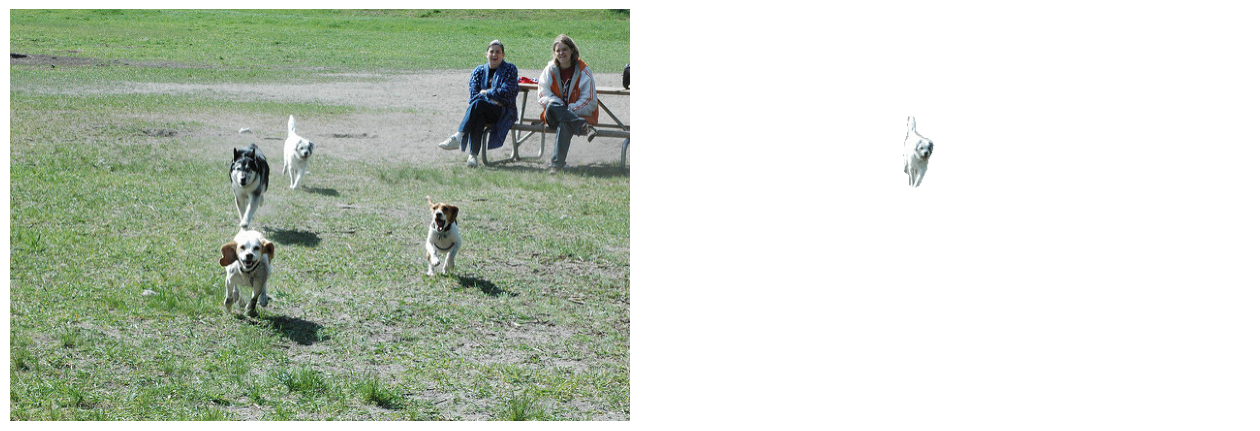

In [ ]:
show_segment(image_RGB, r, 0, False)

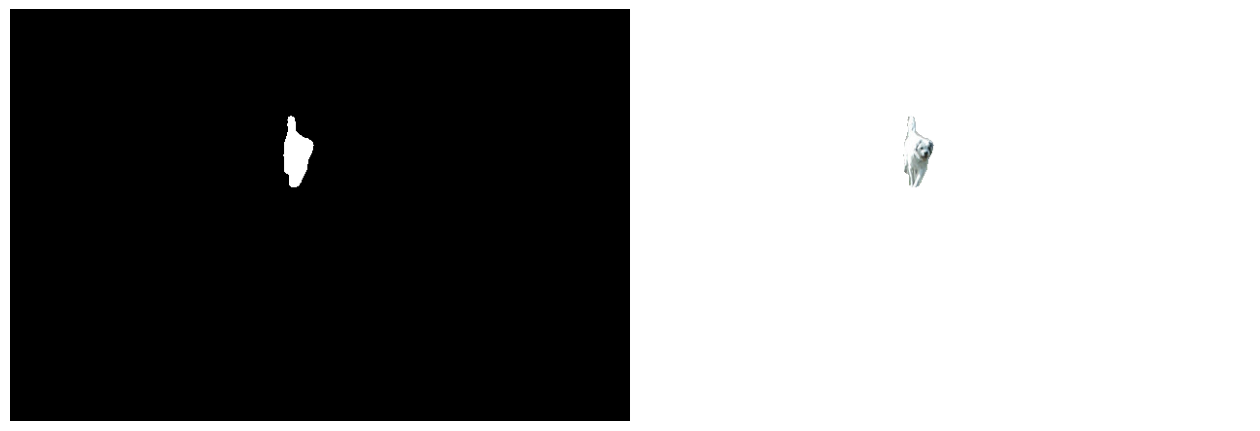

In [ ]:
show_segment(image_RGB, r, 0, True)

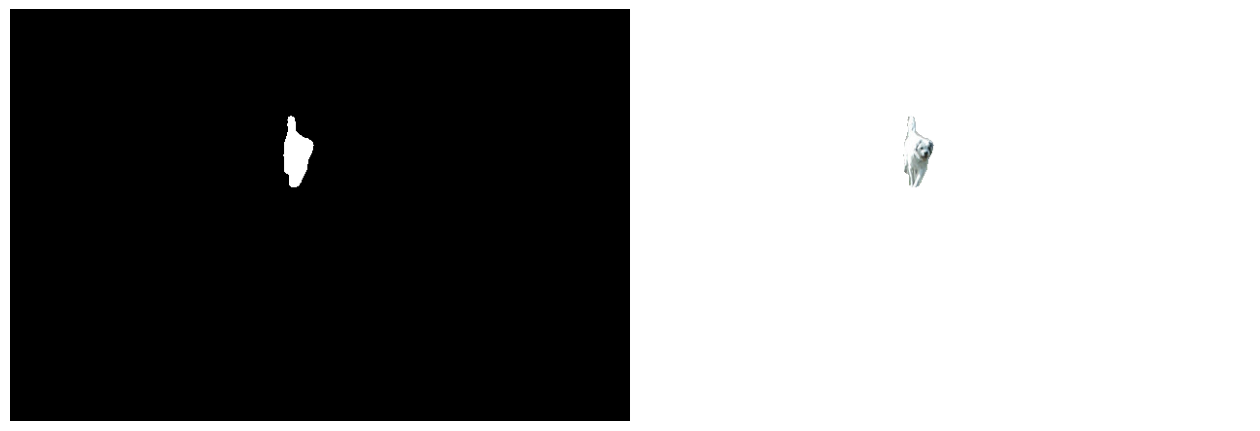

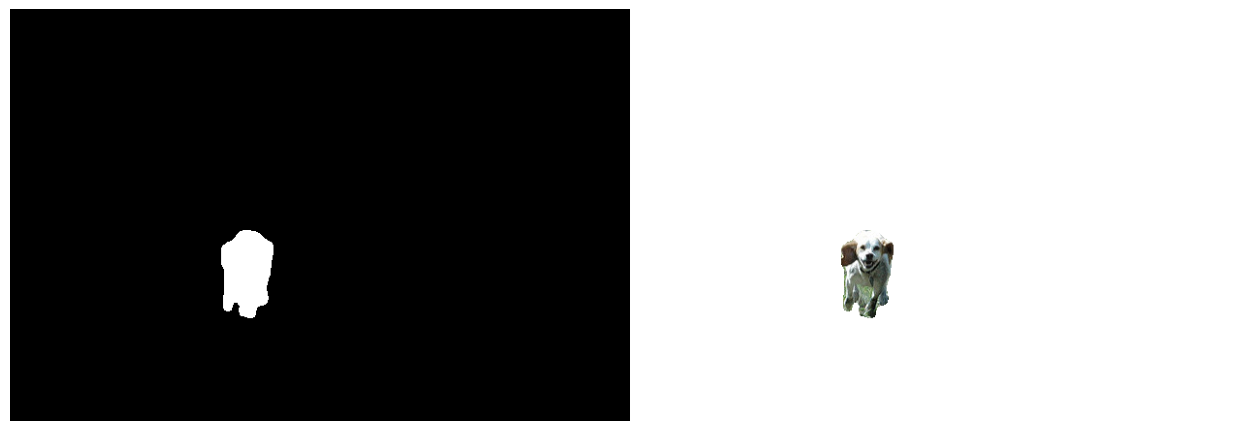

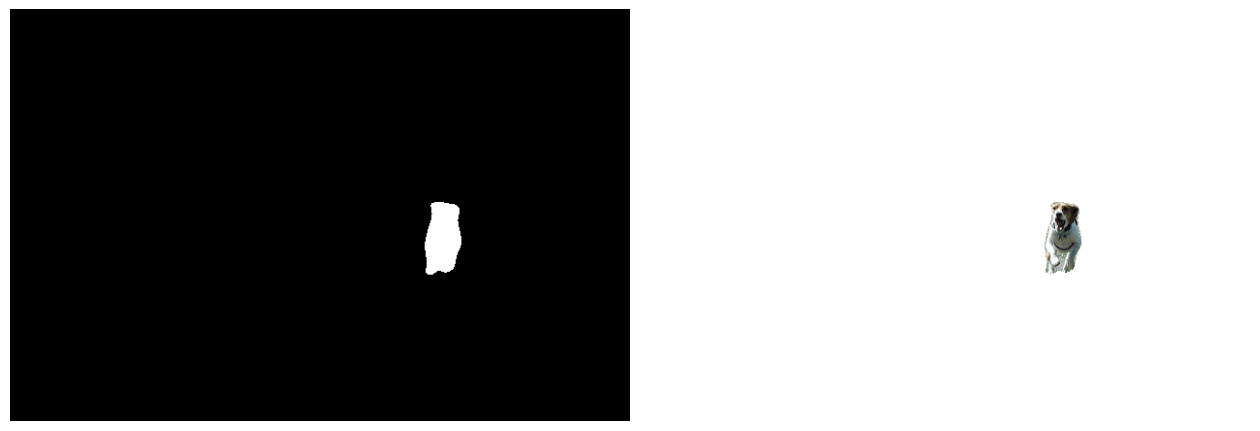

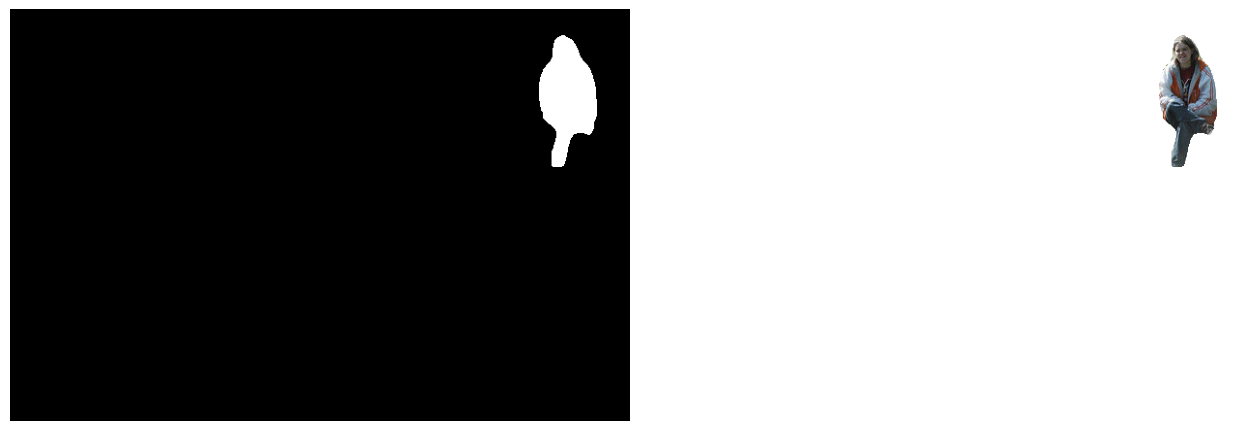

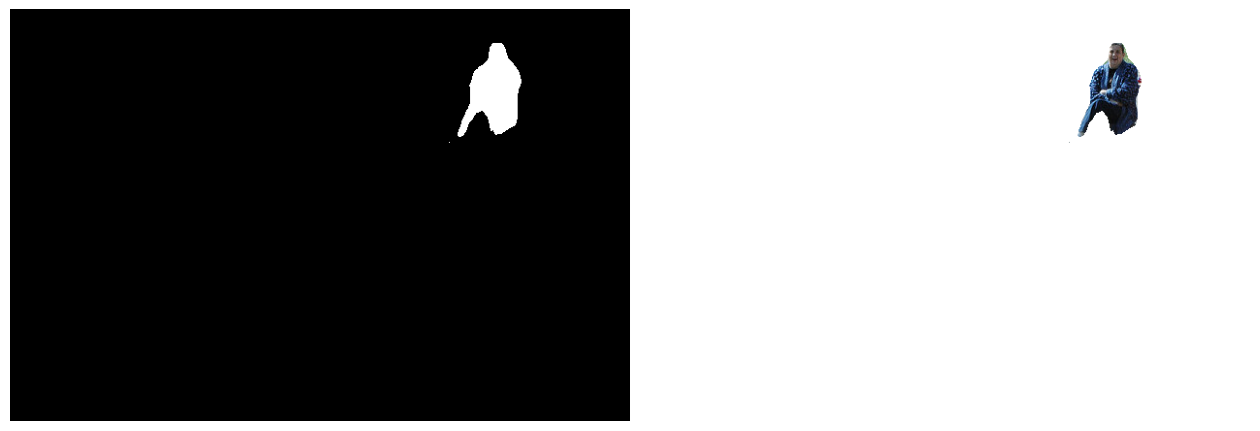

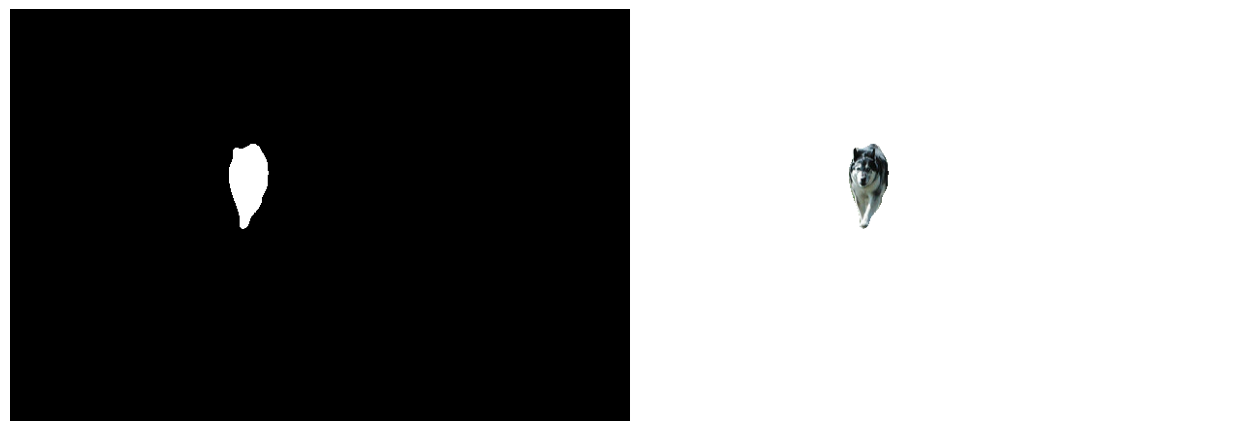

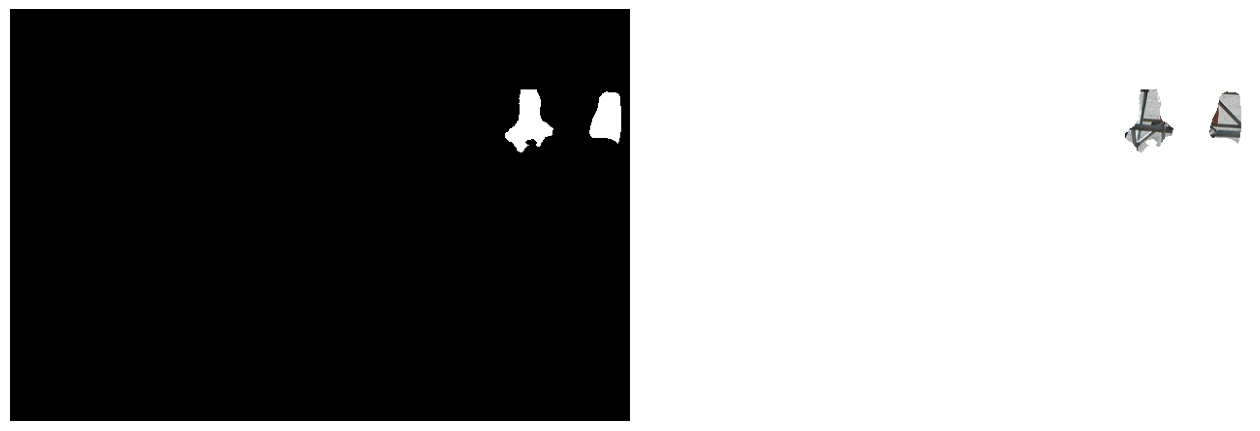

In [ ]:
for index in range(len(r['rois'])):
    show_segment(image_RGB, r, index, True)

# 영상 segmentation

In [ ]:
video_root = '/content/drive/MyDrive/강의자료/Artificial Intelligence/Computer Vision/Computer vision basic/Videos/'
video_name = 'video_street2.mp4'
capture = cv2.VideoCapture(video_root +video_name )
connected, frame = capture.read()
connected

False

In [ ]:
frame.shape

AttributeError: ignored

In [ ]:
save_video = cv2.VideoWriter(video_root + 'video_street2_seg_result.avi',
                             cv2.VideoWriter_fourcc(*'XVID'),
                             24,
                            (frame.shape[1], frame.shape[0])
                            )

In [ ]:
!cp /content/drive/MyDrive/py_mod/video_functions.py /content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/mrcnn

In [ ]:
from mrcnn import video_functions

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
MODEL_DIR = os.path.join(root_dir, 'logs')
IMAGE_DIR = os.path.join(root_dir, 'images')
MODEL_DIR, IMAGE_DIR

In [ ]:
colors = video_functions.random_colors(len(class_names), 55)
len(colors)

In [ ]:
print(colors)

In [ ]:
def show(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [ ]:
frame_show = 20
current_frame = 0

In [ ]:
while (cv2.waitKey(1) < 0):
  connected, frame = capture.read()

  if not connected:
    break

  results = network.detect([frame], verbose=0)
  r = results[0]

  processed_frame = video_functions.display_instances(frame, r['rois'], r['masks'],
                                                      r['class_ids'], class_names, r['scores'], colors=colors)

  if current_frame <= frame_show:
    show(processed_frame)
    current_frame += 1

  save_video.write(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
save_video.release()

# 실습
 1.  제공된 교육용 데이터를 대상으로 객체인식 및 image segmentation 작업을 수행하시오

 2. https://domf5oio6qrcr.cloudfront.net/medialibrary/11525/conversions/0a5ae820-7051-4495-bcca-61bf02897472-thumb.jpg 의 이미지를 활용하여 apple ripeness detector 기능을 구현하시오

In [ ]:
images = [os.path.join('/content/Mask_RCNN-TF2/images', f) for f in os.listdir('/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/images')]
images

['/content/Mask_RCNN-TF2/images/1045023827_4ec3e8ba5c_z.jpg',
 '/content/Mask_RCNN-TF2/images/12283150_12d37e6389_z.jpg',
 '/content/Mask_RCNN-TF2/images/2383514521_1fc8d7b0de_z.jpg',
 '/content/Mask_RCNN-TF2/images/2502287818_41e4b0c4fb_z.jpg',
 '/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg',
 '/content/Mask_RCNN-TF2/images/25691390_f9944f61b5_z.jpg',
 '/content/Mask_RCNN-TF2/images/262985539_1709e54576_z.jpg',
 '/content/Mask_RCNN-TF2/images/3132016470_c27baa00e8_z.jpg',
 '/content/Mask_RCNN-TF2/images/3627527276_6fe8cd9bfe_z.jpg',
 '/content/Mask_RCNN-TF2/images/3651581213_f81963d1dd_z.jpg',
 '/content/Mask_RCNN-TF2/images/3800883468_12af3c0b50_z.jpg',
 '/content/Mask_RCNN-TF2/images/3862500489_6fd195d183_z.jpg',
 '/content/Mask_RCNN-TF2/images/3878153025_8fde829928_z.jpg',
 '/content/Mask_RCNN-TF2/images/4410436637_7b0ca36ee7_z.jpg',
 '/content/Mask_RCNN-TF2/images/4782628554_668bc31826_z.jpg',
 '/content/Mask_RCNN-TF2/images/5951960966_d4e1cda5d0_z.jpg',
 '/content/Ma